# 误差反向传播

In [1]:
!python ch05/buy_apple.py

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


In [2]:
!python ch05/buy_apple_orange.py

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


### gradient checking

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:4.2666341818602346e-10
b1:2.5061171515555933e-09
W2:5.73439859232883e-09
b2:1.4089671770689537e-07


In [40]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

iters_num = 20000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


0.10531666666666667 0.1029
0.9062833333333333 0.9064
0.9292833333333334 0.9318
0.9402 0.94
0.9504833333333333 0.9489
0.9576166666666667 0.9549
0.96185 0.9577
0.9658833333333333 0.9625
0.96895 0.9648
0.9735333333333334 0.967
0.9752833333333333 0.9675
0.9767666666666667 0.9695
0.9789666666666667 0.971
0.9795333333333334 0.9715
0.9816333333333334 0.9722
0.9831166666666666 0.9738
0.9845333333333334 0.9745
0.9854666666666667 0.9752
0.9860666666666666 0.9736
0.98715 0.9757
0.9882 0.9764
0.9895166666666667 0.9761
0.9891833333333333 0.9757
0.9899 0.9757
0.9903333333333333 0.9771
0.9915666666666667 0.9769
0.99095 0.9759
0.9918 0.9772
0.9924666666666667 0.9774
0.9930833333333333 0.9791
0.9936166666666667 0.9762
0.99395 0.9768
0.9942333333333333 0.9784
0.9938 0.9772


> 相比于ch04.ipynb中的三万次结果96%的识别精度，这里两万次训练出来的就达到了99%的识别精度，就是因为这里的反向传播写成了更为高效的矩阵形式，而且也引入了各种层的准确定义，后面还有比如卷积层、池化层、全连接层等等，这些层的定义都是基于矩阵的，所以这里的反向传播也是基于矩阵的，这样就大大提高了计算效率和计算精度。

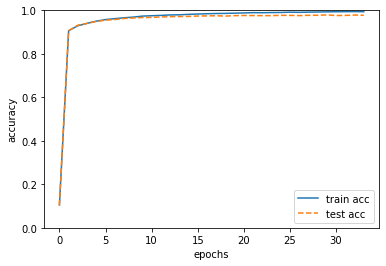

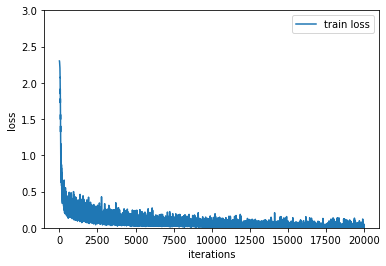

In [41]:
import matplotlib.pyplot as plt
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 绘制损失函数的值
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 3.0)
plt.legend(loc='upper right')
plt.show()

In [11]:
import imageio # for reading images
import glob # for reading files
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

In [36]:

our_DataSet = []
for imageFile in glob.glob('myImages/*.png'):
    print('opening: ', imageFile)
    imageLabel = imageFile[9:-4]
    
    # read in the image.png to grey as a greyscale 255 is white and 0 is black
    imageArray = imageio.imread(imageFile, as_gray=True) 

    # 0 is white and 1 is black in the matplotlib image so we invert the array above
    # reshape the image to a 1D array of 784 pixels(28x28)
    img_data = 255.0 - imageArray.reshape(784) 

    # normalize the image data to be between 0.01 and 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01 
    recordMyData = np.append(imageLabel,img_data)
    our_DataSet.append(recordMyData)
    pass


opening:  myImages\0.png
opening:  myImages\1.png
opening:  myImages\2.png
opening:  myImages\3.png
opening:  myImages\4.png
opening:  myImages\5.png
opening:  myImages\6.png
opening:  myImages\7.png
opening:  myImages\8.png
opening:  myImages\9.png


神经网络预测结果为: 9
神经网络预测结果为: 8
神经网络预测结果为: 2
神经网络预测结果为: 3
神经网络预测结果为: 4
神经网络预测结果为: 8
神经网络预测结果为: 6
神经网络预测结果为: 8
神经网络预测结果为: 2
神经网络预测结果为: 7


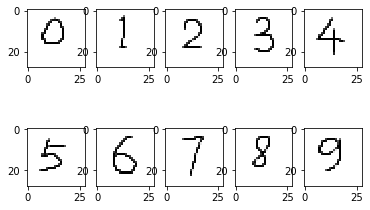

In [43]:
for index in range(10):
    # you can change the index to see different images
    plt.subplot(2,5,index+1)
    # show the image 255 is white and 0 is black we turn it into a 28x28 array
    plt.imshow(np.asfarray(our_DataSet[index][1:]).reshape((28,28)), cmap='Greys', interpolation='None')

    # 利用训练好的网络进行预测
    x = np.array(our_DataSet[index][1:], ndmin=1, dtype=float)
    y = network.predict(x.reshape(1,784))
    # print(y)
    p = np.argmax(y) # 获取概率最高的元素的索引
    print("神经网络预测结果为: " + str(p))

In [33]:
# 将训练好的参数保存到文件中
import pickle
with open("myweight.pkl", 'wb') as f:
    pickle.dump(network.params, f)
